# Phase 2 Project Submission

Austin Collins <br>
Self-Paced <br>
Reviewed on July 18, 2022 at 12:00 pm CST <br>
Instructor Name: Claude Fried <br>
Reviewing Instructor: Morgan Jones <br>
Blog Post URL:

## Introduction

Homeowners who are looking to sell their homes have a chance to take in more money than they paid for it. For many families, it's one of the few opportunities they have to make several, if not tens of thousands of dollars in one move. When so much is at stake, they turn to professionals (i.e. real estate agents) for advice on how to get a fair price and make the most of this opprtunity. 

This notebook will determine what the most important factors are that dive home prices. With this information, a real estate agent in King County, Oregon can tell their client what they can do to increase the value of their home before they put it on the market.

To start, we'll import the necessary libraries to do our analysis, and then take a preliminary look at the data.

In [36]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from scipy import stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## EDA

We'll start by seeing bringing in our data set which includes home sales data from King County, Oregon, and see what kinds of columns we have.

In [37]:
df = pd.read_csv('data/kc_house_data.csv') #adds data from csv file into a Pandas dataframe to make it easier to work with

df.head() #gives information about first 5 rows in the table

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We see information about date sold, price, bedrooms and bathrooms, size, location, views, whether or not the property is by the water, and some information about sales comparable in the sqft_living15 and sqft_lot15 columns. These give details about the average lot size and living space of the 15 homes closest to that house.

We also see data about condition and grade. Per the informational document found [here]('https://github.com/acollins28/dsc-phase-2-project-v2-3/blob/main/data/column_names.md'), "grade" has to do with the quality of the materials used to build the home, while "condition" refers to the cleanliness of the home.

Sqft_above refers to the square footage of the home above the basement.

Next we can look at some of the overarching information about the data within these columns, such as mean, minimum values, maximum values, standard deviations, etc. We can use the .describe() method to do just that.

In [38]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


This is gives us a great overview of the data we have. A few kay takeaways are:

 - homes are priced between 78,000 and 7,700,000 dollars
 - most homes are between 322,000 and 645,000 dollars
 - the avereage home has 3.3 bedrooms and 2.1 bathrooms, with about 2,080 living square footage
 - all homes are between 1 and 3.5 floors
 - the average home was built around 1971, but some are over 100 years old

I noticed that there is a home listed as having 33 bedrooms. Either that's an extreme outlier, or some sort of input error. We will investigate that later.

So now that we have a basic understanding of the data we're working with, we can dive into some more information that we will need in order to build a model later. By using the .info() method, we can pull up information about missing data values, how many rows of data we have, and whether values are being read as text or as numerical data.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have 21,597 rows of data, meaning we have information about 21,597 homes. That is plenty of data with which to build a model.

However, not every row has complete information about a given home, such as 'yr_renovated' having fewer than 21,597 non-nulls.

Furthermore, not all columns of data are being read as quantiative data. In this case, some columns are being read as numbers, whether that's in integer form or float (numbers with decimals) form, while others are being read as text inputs, or objects.

It looks like we'll have to convert some columns with qualitative data (such as view, waterfront, and condition) into integers or floats so we can build models with them. We'll also have to replace null values for the waterfront, view, and yr_renovated columns.

## Filling Null Values

In [40]:
df['waterfront'].value_counts() #lets us see the count of each data value
                                

NO     19075
YES      146
Name: waterfront, dtype: int64

Here we see that the "waterfront" column is boolean in nature. That is to say it's a binary piece of information, either the home is considered a waterfront property or it isn't. We can also see that we have less than 21,597 entries in this column. 

I am going to assume that if a home doesn't have a waterfront value, it means it is not waterfront. It would logically make sense that a homeowner with a waterfront property would make sure to fill out that information, but a homeowner not near the water would just skip over it or leave it blank. This also applies for things like basement size and year renovated. This will be reitereated as we go along.

In [41]:
df['waterfront'] = df['waterfront'].fillna('NO') #fillna() method replaces all empty values with value of choice
                                                 #('NO') in this case, to match existing data

In [42]:
df.info() #look to ensure our changes were implemented

#waterfront column should have 21,597 non-nulls now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [43]:
df['view'].value_counts() #same process as waterfront column

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

For view, we see that there is a scale of views, ranging from avverage to excellent. Also, the vast majority of homes are listed as having no view at all, indicated by the NONE value. 

To replace empty values here, I'm going to follow the same logic as waterfront. If a home doesn't have a notable view, it's reasonable that this part of the survey was skipped over or left blank.

In [44]:
df['view'] = df['view'].fillna('NONE') #using 'NONE' to match existing data

In [45]:
df.info() #check to see null/empty values were replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [46]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Finally, we have the year the home was renovated, with data being the year as a number value. In this case, we can say that a value of zero would mean that it has never been renovated. Given that zero is by far the most common value, we are going to say that a home with a missing/null value has not been renovated.

We could replace null values with the average renovation year in the data set, but since zero is so overwhelmingly popular as an answer, we can safely assume that a missing value means it was not renovated.

In [47]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0) #replaces null values with 0

In [48]:
df.info() #final check that all columns have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

At one point during my EDA, I found what I thought was an outlier with 33 bedrooms, so let's examine that further.

In [49]:
df.loc[df['bedrooms'] == 33] #isolate the row of data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [50]:
#I can believe that's an input error, and the home is actually 3 bedrooms instead of 33

df['bedrooms'] = df['bedrooms'].replace(33, 3) #replaces 33 with 3

In [51]:
df['bedrooms'].describe() #to check that the max value is no longer 33

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

## Transforming Qualitative Data

In [52]:
df['waterfront'].value_counts() #looking at the values for waterfront again

NO     21451
YES      146
Name: waterfront, dtype: int64

The waterfront column is a boolean column, where a home is or is not considered waterfront. With that, we can replace NO with a zero, and YES with a one. This way, when our model is created, a zero will mean that it doesn't increase the home's price, but the fact it is waterfront will add a certain amount to the price of the home. This intuitively makes sense: waterfront properties tend to sell more than otherwise. 

In [53]:
df['waterfront'] = df['waterfront'].replace(['NO','YES'],['0','1']).astype(float) #float type so data can be included in model calculations

In [54]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

With condition, we seem to have a 5 point scale for the cleanliness of homes, ranging from poor to very good. With that scale in mind, we can rank order homes by poor, fair, average, good, and very good. We can then make this a 1-5 number rating, rather than having text descriptons. That way, homes that are cleaner will have more value, and homes with worse condition will have lower value in the model.

In [55]:
df['condition'] = df['condition'].replace(['Poor','Fair','Average','Good','Very Good'],['1','2','3','4','5']).astype(float)

#replaces text descriptions with corresponding number value in rank order, and then makes the column data a float so it can be
# included in model calculations

In [56]:
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Value counts provides an interesting scenario. It's a sliding scale, from fair to excellent, with most homes being listed as not having a view. It also only has four descriptive values instead of five.

For the sake of consistency in language, we are going to assume that homes with an "average" view are middle of the road, much in the same way that 'average' homes in condition are in the middle of a five point scale. This assumes that no homes were listed as having a "poor" view, which would be below fair. However, it could be reasoned a poor view isn't a noteworthy view at all, so a house with a poor view could be labeled as just not having a view to avoid discussing a possible negative aspect of the house to prospective buyers. No one would deliberately list a house and point out a flaw of a poor view, and instead just avoid the subject. 

So with that, we are going to act as if view is also on a five point scale, and replace values the same way we did with condition.

In [57]:
#assuming that the scale goes from poor, fair, average, good, excellent

df['view'] = df['view'].replace(['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],['0','2','3','4','5']).astype(float)

In [58]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

With grade, we are provided the corresponding number value on which a home is scored. So instead of replacing values like we have with other clumns, we can simply isolate the number value and ditch the descriptions.

In [59]:
#split() method will isolate number in its own column, with values split by the spaces between the number and the words

grading = df['grade'].str.split(' ', n=2, expand=True)

grading

,0,1,2
0,7,Average,None
1,7,Average,None
2,6,Low,Average
3,7,Average,None
4,8,Good,None
...,...,...,...
21592,8,Good,None
21593,8,Good,None
21594,7,Average,None
21595,8,Good,None


## Changing All Data to Numerical Types

So now that we have replaced or isolated all of the data we need and no longer have null values, all we have to do before building a model is make sure all columns have numerical data types. We can start this process by revisiting the grade information that we just isolated, and replace the existing data with just the number value, and then assert a numerical data type.

In [60]:
grading[0].value_counts() #to double check that our isolated data corresponds to the original

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: 0, dtype: int64

In [61]:
df['grade'] = grading[0].astype(float) #replaces existing values with isolated values we created, changes column to numerical data

In [62]:
df.info() #double check that the data type has changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  float64
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [63]:
df['sqft_basement'].value_counts() #to see if we have non-numerical data that makes the column have object type data

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2050.0        1
2130.0        1
475.0         1
2196.0        1
516.0         1
Name: sqft_basement, Length: 304, dtype: int64

We have found what's causing this column to have an object data type. My assumption is that the question mark was placed to mark that data was unknown or left blank, since it is separate from being listed as a basement with zero square feet. Because the majority of homes have zero as the value, meaning they don't have a basement at all, I can reasonably assume that a home without the square footage listed simply doesn't have a basement. This is very similar logic as the waterfront column.

So we will replace the question marks with a zero, and then turn the column's data type to a float.

In [64]:
#assume that missing values means they don't have a basement, so they left that field blank

df['sqft_basement'] = df['sqft_basement'].replace('?','0.0').astype(float)

In [65]:
df.info() #double check our float type assertion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  float64
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Building the Model

Now that our data is clean, we can start building models to determine what drives price. 

ID, date, and zipcode will not be super useful for our purposes. 

Zipcode in particular won't be as reliable of a location factor as latitude and longitude. It doesn't logically flow that a home with a zipcode of 45067 is worth less than one with a zipcode of 45068. Besides, latitude and longitude or more precise markers.

ID isn't a feature of a home as much as it is a label for this table, and date (or date sold) doesn't inherently mean much to us since it describes when a transaction happened, rather than an attribute of the home.

Price will not be part of our features since it is the target of our model.

For this analysis, we will build an Ordinary Least Squares model. This is a linear model that will use multiple x variables and one y variable to create a line of best fit within the data. This line will minimize the space between data points, similar to any other form of linear regression.

We are building an inferential model. This means that we are trying to determine what factors influence a home's price, rather than predict what a home's price will be given a bunch of inputs.

Our first model will include all relevant features, and then we will alter our model based on what we see. Explanations on what we change will be located next to each iteration of our model.

We will use the StatsModels library to build our models. This way we can write about 3 lines of code and build a linear regression, rather than coding everything out by hand.

In [66]:
base_features = sm.add_constant(df.drop(['id', 'date','price','zipcode'], axis=1)) #removes variables we won't use
target = df['price'] #sets price as our Y variable

base_model = sm.OLS(target, base_features).fit() #creates model/line of best fit

In [67]:
base_model.summary() #gives us information about the model we created

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2905.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:31:56   Log-Likelihood:            -2.9453e+05
No. Observations:               21597   AIC:                         5.891e+05
Df Residuals:                   21579   BIC:                         5.892e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.678e+07    1.6e+06    -23.036      0.000   -3.99e+07   -3.36e+07
bedrooms      -3.753e+04   1991.619    -18.845      0.000   -4.14e+04   -3.36e+04
bathrooms      4.374e+04   3289.667     13.295      0.000    3.73e+04    5.02e+04
sqft_living      99.8317     18.204      5.484      0.000      64.151     135.513
sqft_lot          0.1251      0.048      2.593      0.010       0.031       0.220
floors         1094.3633   3609.605      0.303      0.762   -5980.730    8169.456
waterfront     6.402e+05    1.8e+04     35.530      0.000    6.05e+05    6.76e+05
view           3.527e+04   1539.053     22.915      0.000    3.23e+04    3.83e+04
condition      3.145e+04   2347.830     13.397      0.000    2.69e+04    3.61e+04
grade          9.789e+04   2175.616     44.994      0.000    9.36e+04    1.02e+05
sqft_above       81.2341     18.192      4.465      0.000      45.576     116.892
sqft_basement    49.3018     18.030      2.734      0.006      13.962      84.641
yr_built      -2484.9807     71.885    -34.569      0.000   -2625.882   -2344.080
yr_renovated     24.8096      4.004      6.196      0.000      16.961      32.658
lat            5.575e+05   1.05e+04     52.843      0.000    5.37e+05    5.78e+05
long          -1.182e+05    1.2e+04     -9.836      0.000   -1.42e+05   -9.46e+04
sqft_living15    27.1451      3.461      7.842      0.000      20.361      33.930
sqft_lot15       -0.4032      0.074     -5.459      0.000      -0.548      -0.258
==============================================================================
Omnibus:                    18424.550   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1825810.403
Skew:                           3.593   Prob(JB):                         0.00
Kurtosis:                      47.467   Cond. No.                     5.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That is a lot of information at once, especially for having written a single line of code to see it. Let's walk through what's important.

First is the R-squared value in the top right corner of the table. This tells us how much of the randomness of the data is accounted for in our model. Another way to think about it is that 69.6% of a given home's price is explained by this model, and the other 30% is due to factors that we currently don't have data for or can't measure.

Next is the "coef" column. This tells us if a given factor has a positive or negative effect on price, and by how many dollars. For example, for every square foot added to a basement, home price will go up by about 49 dollars. Conversely, for every square foot larger your neighbor's lot is, your home's price will go down by about 40 cents. 

The third important column to note is the "P>|t|" column. This provides us information about how confident we are that a given factor/variable helps explain the randomness of the data. This is based on confidence intervals. 

For our purposes, we want to be at least 95% confident that a variable is truly helping explain a home's price. Our p-value, a measure of our confidence, then must be lower than 0.05 (1 - 0.95) in order to fit within our confidence interval. 

Our model explains almost 70% of the variance. However, number of floors ended up being an unreliable feature (p > 0.05). So we will remove that feature and see what happens next.

In [68]:
model2_x = base_features.drop('floors', axis=1) #drop() method removes chosen column from dataframe

In [69]:
model2_x.info() #double check that column was removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   waterfront     21597 non-null  float64
 6   view           21597 non-null  float64
 7   condition      21597 non-null  float64
 8   grade          21597 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 2.8 MB


In [70]:
model2 = sm.OLS(target, model2_x).fit() #creates model with new set of variables

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3087.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:31:56   Log-Likelihood:            -2.9453e+05
No. Observations:               21597   AIC:                         5.891e+05
Df Residuals:                   21580   BIC:                         5.892e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07   1.57e+06    -23.456      0.000   -3.99e+07   -3.38e+07
bedrooms      -3.755e+04   1990.758    -18.862      0.000   -4.15e+04   -3.36e+04
bathrooms        4.4e+04   3172.672     13.868      0.000    3.78e+04    5.02e+04
sqft_living      99.4216     18.153      5.477      0.000      63.840     135.003
sqft_lot          0.1248      0.048      2.587      0.010       0.030       0.219
waterfront     6.402e+05    1.8e+04     35.531      0.000    6.05e+05    6.76e+05
view           3.528e+04   1538.229     22.937      0.000    3.23e+04    3.83e+04
condition       3.14e+04   2342.017     13.409      0.000    2.68e+04     3.6e+04
grade          9.795e+04   2167.291     45.193      0.000    9.37e+04    1.02e+05
sqft_above       81.8241     18.087      4.524      0.000      46.372     117.276
sqft_basement    49.3027     18.029      2.735      0.006      13.964      84.641
yr_built      -2480.5287     70.368    -35.251      0.000   -2618.456   -2342.602
yr_renovated     24.8607      4.000      6.214      0.000      17.020      32.702
lat            5.578e+05   1.05e+04     53.171      0.000    5.37e+05    5.78e+05
long          -1.187e+05   1.19e+04     -9.973      0.000   -1.42e+05   -9.54e+04
sqft_living15    27.0173      3.435      7.864      0.000      20.283      33.751
sqft_lot15       -0.4040      0.074     -5.472      0.000      -0.549      -0.259
==============================================================================
Omnibus:                    18415.726   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1822599.236
Skew:                           3.591   Prob(JB):                         0.00
Kurtosis:                      47.428   Cond. No.                     5.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not much changed. We are now confident that these variables have a meaningful impact on price, but the R-squared value has not increased. 

To try and increase our r-sqaured value, let's try engineering a new feature called "livable area." It will be the product of bedrooms, bathrooms, and sqft_living, since bedrooms and bathrooms are part of what makes up living square footage.

In [72]:
model2_x['livable_area'] = model2_x['bedrooms'] * model2_x['bathrooms'] * model2_x['sqft_living']

#multiplies bedrooms, bathrooms, and sqft_living, the product of which is our new value that goes in the dataframe

In [73]:
model2_x.info() #double check that the new column was created

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   waterfront     21597 non-null  float64
 6   view           21597 non-null  float64
 7   condition      21597 non-null  float64
 8   grade          21597 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  livable_area   21597 non-null  float64
dtypes: flo

In [74]:
model3_x = model2_x.drop(['bedrooms','bathrooms','sqft_living'], axis=1) #removes the three columns we used to make the new "livable_area"

In [75]:
model3 = sm.OLS(target, model3_x).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     3703.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:31:56   Log-Likelihood:            -2.9417e+05
No. Observations:               21597   AIC:                         5.884e+05
Df Residuals:                   21582   BIC:                         5.885e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.692e+07   1.54e+06    -23.986      0.000   -3.99e+07   -3.39e+07
sqft_lot          0.1578      0.047      3.328      0.001       0.065       0.251
waterfront     6.599e+05   1.77e+04     37.295      0.000    6.25e+05    6.95e+05
view           3.727e+04   1506.107     24.744      0.000    3.43e+04    4.02e+04
condition      3.335e+04   2295.315     14.529      0.000    2.88e+04    3.78e+04
grade          1.113e+05   2105.446     52.845      0.000    1.07e+05    1.15e+05
sqft_above       71.5157      4.203     17.016      0.000      63.278      79.754
sqft_basement    43.9037      4.494      9.768      0.000      35.094      52.713
yr_built      -2181.8217     63.236    -34.503      0.000   -2305.770   -2057.874
yr_renovated     31.2010      3.896      8.008      0.000      23.564      38.838
lat             5.68e+05   1.03e+04     55.186      0.000    5.48e+05    5.88e+05
long          -1.101e+05   1.17e+04     -9.414      0.000   -1.33e+05   -8.72e+04
sqft_living15    39.6957      3.393     11.698      0.000      33.045      46.347
sqft_lot15       -0.3175      0.072     -4.384      0.000      -0.459      -0.176
livable_area      4.6282      0.131     35.359      0.000       4.372       4.885
==============================================================================
Omnibus:                    14601.712   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912658.916
Skew:                           2.580   Prob(JB):                         0.00
Kurtosis:                      34.426   Cond. No.                     5.88e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our new feature helps the model explain only slightly more of the variance, but it is a rather robust feature with a very small standard error. This makes it a reliable explainor of the variance.

An r-squared 0.706 is really good. Having explained over 70% of the variance in price, we can move forward with making recommendations with a good degree of confidence that our advice to stakeholders will be worthwhile. 

The next thing to tackle is the possible colinearity, as indicated by the notes at the bottom of the table. We will determine the VIF, or variance inflation factor, for each feature. This will tell us the amount of multicolinearity of each individual variable. Generally, a score below 5 is safe, 5-10 is a "use with caution" zone, and anything above 10 must be removed. 

In [76]:
vif_data = pd.DataFrame()

In [77]:
vif_data['feature'] = model3_x.columns

In [78]:
vif_data['VIF'] = [variance_inflation_factor(model3_x.values, i)
                          for i in range(len(model3_x.columns))]

In [79]:
vif_data

,feature,VIF
0,const,1.288807e+06
1,sqft_lot,2.097904e+00
2,waterfront,1.143830e+00
3,view,1.349760e+00
4,condition,1.213039e+00
5,grade,3.319453e+00
6,sqft_above,6.584822e+00
7,sqft_basement,2.125884e+00
8,yr_built,1.877289e+00
9,yr_renovated,1.094486e+00


The only feature with a VIF above 5 is sqft_above. It's not a make-or-break for our model, but we'll go ahead and remove it anyway just to be safe.

In [80]:
model4_x = model3_x.drop('sqft_above', axis=1) #remove the feature that had a VIF above 5

model4_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   sqft_lot       21597 non-null  int64  
 2   waterfront     21597 non-null  float64
 3   view           21597 non-null  float64
 4   condition      21597 non-null  float64
 5   grade          21597 non-null  float64
 6   sqft_basement  21597 non-null  float64
 7   yr_built       21597 non-null  int64  
 8   yr_renovated   21597 non-null  float64
 9   lat            21597 non-null  float64
 10  long           21597 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  livable_area   21597 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.3 MB


In [81]:
model4 = sm.OLS(target, model4_x).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3913.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:31:58   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21583   BIC:                         5.888e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.412e+07   1.54e+06    -22.147      0.000   -3.71e+07   -3.11e+07
sqft_lot          0.1960      0.048      4.110      0.000       0.103       0.289
waterfront     6.699e+05   1.78e+04     37.630      0.000    6.35e+05    7.05e+05
view            3.63e+04   1515.050     23.956      0.000    3.33e+04    3.93e+04
condition      3.394e+04   2310.340     14.691      0.000    2.94e+04    3.85e+04
grade          1.256e+05   1942.588     64.651      0.000    1.22e+05    1.29e+05
sqft_basement    -2.2493      3.608     -0.623      0.533      -9.321       4.822
yr_built      -2180.7830     63.658    -34.258      0.000   -2305.557   -2056.009
yr_renovated     33.5821      3.920      8.568      0.000      25.899      41.265
lat            5.581e+05   1.03e+04     53.952      0.000    5.38e+05    5.78e+05
long          -9.065e+04   1.17e+04     -7.737      0.000   -1.14e+05   -6.77e+04
sqft_living15    62.0167      3.150     19.686      0.000      55.842      68.192
sqft_lot15       -0.2845      0.073     -3.904      0.000      -0.427      -0.142
livable_area      6.1791      0.095     65.338      0.000       5.994       6.364
==============================================================================
Omnibus:                    13952.842   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1002064.255
Skew:                           2.357   Prob(JB):                         0.00
Kurtosis:                      36.035   Cond. No.                     5.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model still explains about the same amount of variance. However, sqft_basement is now unreliable as a variable witha p-value way above 0.05. So, we'll have to remove that.

In [82]:
model5_x = model4_x.drop('sqft_basement', axis=1)

model5_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   sqft_lot       21597 non-null  int64  
 2   waterfront     21597 non-null  float64
 3   view           21597 non-null  float64
 4   condition      21597 non-null  float64
 5   grade          21597 non-null  float64
 6   yr_built       21597 non-null  int64  
 7   yr_renovated   21597 non-null  float64
 8   lat            21597 non-null  float64
 9   long           21597 non-null  float64
 10  sqft_living15  21597 non-null  int64  
 11  sqft_lot15     21597 non-null  int64  
 12  livable_area   21597 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 2.1 MB


In [83]:
model5 = sm.OLS(target, model5_x).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     4239.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:31:59   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21584   BIC:                         5.888e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.398e+07   1.52e+06    -22.283      0.000    -3.7e+07    -3.1e+07
sqft_lot          0.1962      0.048      4.114      0.000       0.103       0.290
waterfront     6.701e+05   1.78e+04     37.649      0.000    6.35e+05    7.05e+05
view           3.614e+04   1494.386     24.184      0.000    3.32e+04    3.91e+04
condition      3.374e+04   2287.665     14.749      0.000    2.93e+04    3.82e+04
grade          1.257e+05   1938.341     64.834      0.000    1.22e+05    1.29e+05
yr_built      -2177.5578     63.446    -34.321      0.000   -2301.917   -2053.199
yr_renovated     33.5594      3.919      8.562      0.000      25.877      41.242
lat            5.576e+05   1.03e+04     54.050      0.000    5.37e+05    5.78e+05
long          -8.967e+04   1.16e+04     -7.723      0.000   -1.12e+05   -6.69e+04
sqft_living15    61.9312      3.147     19.677      0.000      55.762      68.100
sqft_lot15       -0.2847      0.073     -3.906      0.000      -0.428      -0.142
livable_area      6.1589      0.089     69.304      0.000       5.985       6.333
==============================================================================
Omnibus:                    13964.327   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1001147.954
Skew:                           2.361   Prob(JB):                         0.00
Kurtosis:                      36.019   Cond. No.                     5.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we are confident that each variable has an effect on price, and our model explains enough variance that our suggestions will hold weight.

Now we will perform tests for independent errors, normality, and homoscedasity. We may have to alter our model if any of these tests fail. Explanations for each test will ensue.

## Testing Assumptions of Linear Regression

The first thing we're testing for is indpendence of errors. Essentially, we want to know that our observations about each variable or not being influenced by the other variables in the model.

In [84]:
#tests for independent errors, anything between 1.5 and 2.5 is acceptable, and closer to 2 is better

statsmodels.stats.stattools.durbin_watson(model5.resid)


1.9874736447607155

This matches the Durbin-Watson calculation that we got earlier, so we're good there.

((array([-3.99686021, -3.78162805, -3.66389368, ...,  3.66389368,
          3.78162805,  3.99686021]),
  array([-3664104.76950946, -2348105.51121975, -1527351.38257436, ...,
          2884868.15187338,  2997902.23778871,  3771286.87665673])),
 (179426.63914891498, 6.603347086497697e-09, 0.894732607063179))

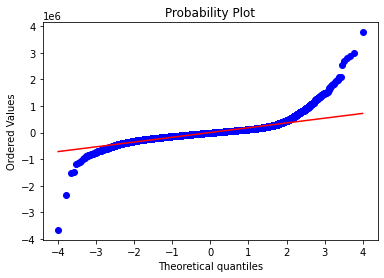

In [92]:
#tests for normality

stats.probplot(model5.resid, dist="norm", plot= plt)

Here, we've tested that our sample data of homes has been drawn from a normally distributed population. Of course it is not going to be perfetly normally distributed, but we can check that it is within reason.

This chart is not the same as a Q-Q plot, but it can tell us the information we need. Essentially, our models are reliable when home values fall within a certain range that is close to the median, and become unreliable when homes are very cheap or very expensive. What that tells me is that most homes fall within a certain range, and homes with prices on the extremes have different criteria for pricing or have one or more variables that are outliers. 

This does not entirely invalidate our model, but it does set limitations on it. Following our .describe() data from our exploratory data analysis, we could say that our model is useful for homes between 322,000 and 645,000 dollars, and a person with a home with a price outside that range will find our model less and less useful the further away from that range the price is.

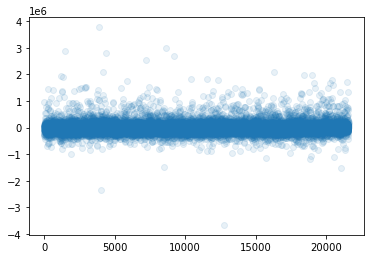

In [86]:
#tests for homoscedasity
lr = LinearRegression()
lr.fit(model5_x, target)
y_hat = lr.predict(model5_x)
resid = (target - y_hat)

plt.scatter(x = range(y_hat.shape[0]), y=resid, alpha=0.1)


Here we've tested for homoscedasity, which is the equal (or almost equal) variance in error terms across data points. In our case, it is clear that the majority of errors are close the 0 line, and there is no distinct shape or pattern that is created by the data points in the above chart. This visual test lets us reasonably assume that there is no pattern in the errors, and we have passed the test for homoscedasity. 

Now we will scale the features to determine how impactful they are to the model. The larger the value, the more impactful.

These will effectively be the most important things for homeowners to adddress before they put their home on the market.

In [77]:
ss = StandardScaler()

In [109]:
ss.fit(model5_x)

scaled_factors = ss.transform(model5_x)

scaled_model = sm.OLS(target, sm.add_constant(scaled_factors)).fit()

scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     4239.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:07:21   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21584   BIC:                         5.888e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1364.741    395.897      0.000    5.38e+05    5.43e+05
x1         -3.901e-12   4.97e-13     -7.845      0.000   -4.88e-12   -2.93e-12
x2          8123.5271   1974.459      4.114      0.000    4253.442     1.2e+04
x3          5.491e+04   1458.532     37.649      0.000    5.21e+04    5.78e+04
x4          3.779e+04   1562.817     24.184      0.000    3.47e+04    4.09e+04
x5          2.195e+04   1488.196     14.749      0.000     1.9e+04    2.49e+04
x6          1.474e+05   2274.009     64.834      0.000    1.43e+05    1.52e+05
x7         -6.396e+04   1863.705    -34.321      0.000   -6.76e+04   -6.03e+04
x8          1.222e+04   1426.778      8.562      0.000    9419.991     1.5e+04
x9          7.726e+04   1429.364     54.050      0.000    7.45e+04    8.01e+04
x10        -1.262e+04   1633.826     -7.723      0.000   -1.58e+04   -9416.192
x11         4.244e+04   2156.583     19.677      0.000    3.82e+04    4.67e+04
x12        -7764.2800   1987.766     -3.906      0.000   -1.17e+04   -3868.112
x13         1.268e+05   1829.104     69.304      0.000    1.23e+05     1.3e+05
==============================================================================
Omnibus:                    13964.327   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1001147.954
Skew:                           2.361   Prob(JB):                         0.00
Kurtosis:                      36.019   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

So grade, livable area, latitude, waterfront, sqft_living 15, view, condition, yr_renovated, and sqft_lot all are positive drivers of price, in order to most to least effect.

Grade, livable area, condition, and yr_renovated are the ones that homeowners have control over, in order of most to least impactful.

## Conclusion

In conclusion, we have determined what the features of a home have the most impact on price. 

There are three factors that negatively affect price: the year the home was built, the longitude coordinate, and the lot size of the 15 nearest homes.

The remaining are positive drivers of price. Here is those factors, ranked from most impactful to least:
 - Grade
 - Livable Area (bedrooms x bathrooms x sqft_living)
 - Latitude
 - Waterfront
 - Sqft-living15
 - View
 - Condition
 - Year Renovated
 - Square footage of the lot
 
Of these positive influences, homeowners have direct control of Grade, Livable Area, Condition, and Year Renovated. Below are suggestions on how to improve each metric in order to drive up home price.

### Grade
There are several things homeowners can do to improve grade. However, many of them are larger, more expensive projects. Because of that, making these changes can also impact your "year renovated" factor.

Items homeowners can tackle include:
 - Upgrade wood finishes
 - Upgrade countertops (replace linoleum with marble)
 - Update the plumbing system
 - Redo the insulation
 - Fix or replace roof
 
### Livable Area
Improving this factor means increasing the usable space in your home. This can include turning a media room into a bedroom, turning a laundry room into a bathroom, or enclosing a part of your house such as a patio.

The limitation with enclosing areas is that it can sometimes ruin selling points of a home. For instance, if one of the major selling points of a home is a being back porch that overlooks a lake, it might not be best to enclose that area. 

### Condition
This really means cleaning the home and making smaller repairs before presenting the home to buyers. Items to handle include:
 - vacuuming carpets
 - touching up paint
 - ensuring electrical outlets work
 - fixing leaky faucets
 
So with this analysis, homeowners have the numbers backing some things that might have intuitively known (such as renovating your home to increase value), and might have had their eyes opened to features they can highlight or include in their listings. 